In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_rental_history_sample = pd.read_csv('../../data/bike_rental_history_weekday_community.csv')
df_rental_history_sample = df_rental_history_sample.loc[df_rental_history_sample['community'] < 3]
df_rental_history_sample

,birth_year,gender,user_type,origin_station_id,desti_station_id,rent_hour,return_hour,rent_minute_of_day,return_minute_of_day,community,origin_lat,origin_lng,origin_dist_to_subway,desti_lat,desti_lng,desti_dist_to_subway
0,1969,M,내국인,ST-3128,ST-2031,9,9,589,596,0,37.563648,126.834541,624.891215,37.566925,126.827438,19.851351
1,1983,F,내국인,ST-3128,ST-2031,17,17,1056,1062,0,37.563648,126.834541,624.891215,37.566925,126.827438,19.851351
2,1987,F,내국인,ST-3128,ST-2031,16,16,965,970,0,37.563648,126.834541,624.891215,37.566925,126.827438,19.851351
3,1997,\N,내국인,ST-3128,ST-2031,11,11,690,696,0,37.563648,126.834541,624.891215,37.566925,126.827438,19.851351
4,1989,\N,내국인,ST-3128,ST-2031,17,17,1024,1027,0,37.563648,126.834541,624.891215,37.566925,126.827438,19.851351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289,2007,M,내국인,ST-2920,ST-1972,17,17,1061,1071,2,37.539726,126.890366,337.344603,37.530735,126.899170,437.422942
11290,1981,\N,내국인,ST-2920,ST-1972,18,18,1083,1094,2,37.539726,126.890366,337.344603,37.530735,126.899170,437.422942
11291,1994,F,내국인,ST-2920,ST-1972,17,17,1064,1072,2,37.539726,126.890366,337.344603,37.530735,126.899170,437.422942
11292,1994,F,내국인,ST-2920,ST-1972,10,10,636,642,2,37.539726,126.890366,337.344603,37.530735,126.899170,437.422942


In [4]:
def count_by_rent_station(df:pd.DataFrame, community:int, start_hour: int, end_hour: int) -> pd.DataFrame:
    df_community = df.loc[df['community'] == community]
    df_community = df_community.loc[df_community['rent_hour']>= start_hour]
    df_community = df_community.loc[df_community['rent_hour']< end_hour]
    df_community = df_community.groupby(['origin_station_id','origin_dist_to_subway']).size().reset_index(name='counts')
    df_community = df_community.sort_values(by='counts', ascending=False)
    return df_community


## Community 0

<Axes: xlabel='origin_dist_to_subway', ylabel='counts'>

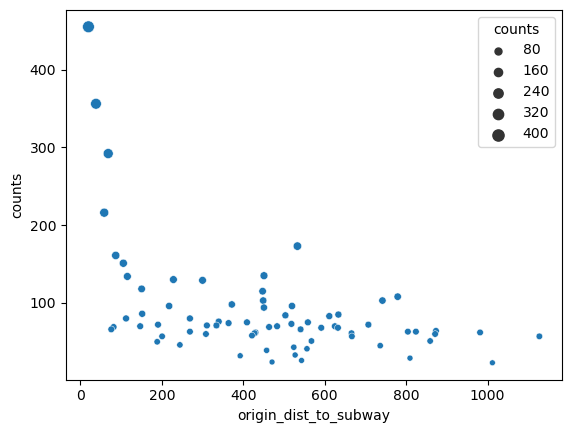

In [5]:
sns.scatterplot(data=count_by_rent_station(df_rental_history_sample, 0 , 0,24), y='counts', x='origin_dist_to_subway', size='counts')

In [9]:
df_count_by_rent_station = count_by_rent_station(df_rental_history_sample, 0,0,24)
df_count_by_rent_station.loc[df_count_by_rent_station['counts'] > 250]

,origin_station_id,origin_dist_to_subway,counts
23,ST-2031,19.851351,455
21,ST-1718,38.351608,356
33,ST-2045,68.372559,292


In [10]:
df_count_by_rent_station

,origin_station_id,origin_dist_to_subway,counts
23,ST-2031,19.851351,455
21,ST-1718,38.351608,356
33,ST-2045,68.372559,292
2,ST-1065,58.571071,216
29,ST-2037,532.914888,173
...,...,...,...
41,ST-2059,392.365980,32
56,ST-2890,809.306852,29
3,ST-1250,543.069173,26
24,ST-2032,470.628537,24
